<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_Intersection_GraphingCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding the intersection of two functions

This is something you might have done in high school on a graphing calculator (the particular functions we're using are inspired by this [post about using the TI-84+](https://www.dummies.com/education/graphing-calculators/how-to-find-points-of-intersection-on-the-ti-84-plus/)).

![TI-84 image](https://github.com/stephenbeckr/numerical-analysis-class/raw/master/Demos/img/398635.image0.jpg)

Let's find the intersection of
$$ f(x) = .2(x-2)x(x+4)  \quad\text{and}\quad g(x) = .5 x $$

First, let's plot the functions:
(for plotting, here's a list of [style sheets](https://matplotlib.org/3.3.1/gallery/style_sheets/style_sheets_reference.html) to use with `plt.style.use`, and [general matplotlib cheatsheets](https://github.com/matplotlib/cheatsheets); if you want to make the axes through the origin, like in the TI-84 picture, this [stackoverflow post](https://stackoverflow.com/a/25689340) gives several methods)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')

# == First, define the function f
# f = lambda x : [TODO]
f = lambda x : .2*(x-2)*x*(x+4)
# or
# def f(x):
#   return [TODO]

# == Now, define g
g = lambda x : .5*x


# == Now, plot

x   = np.linspace(-10,10,100)

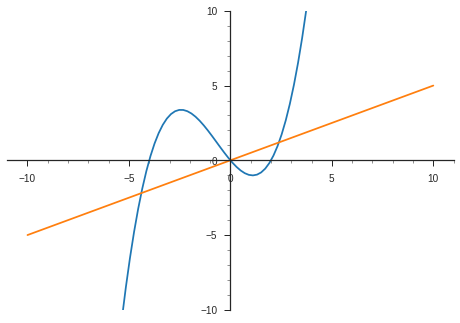

In [36]:
fig, ax = plt.subplots()
ax.plot( x, f(x) )
ax.plot( x, g(x) )
ax.set_ylim(-10,10)
plt.xticks(range(-10,11,5))
plt.yticks(range(-10,11,5))

# Adjust it to look a bit more like the TI-84 image
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.minorticks_on()